# Sketch BackEnd: Data Operations

## Load data

In [1]:
import pandas as pd

df_base = pd.read_parquet('../data/p48_2015_2022_EN.parquet')
df_base

Hydraulic  Adjustment P48  \
year month day hour weekday weekend                              
2015 1     1   0    3       0          2621.90          1300.0   
               1    3       0          2532.30          1000.0   
...                                        ...             ...   
2022 12    31  22   5       1          4055.50          -200.0   
               23   5       1          3963.95          -200.0   

                                     Balance Andorra  Balance Morocco  \
year month day hour weekday weekend                                     
2015 1     1   0    3       0                  -36.0           -540.0   
               1    3       0                  -35.0           -600.0   
...                                              ...              ...   
2022 12    31  22   5       1                  -67.0           -740.0   
               23   5       1                  -62.0           -750.0   

                                     Balance France  Balance Portugal  \
year month day hour weekday weekend                                     
2015 1     1   0    3       0               -1000.0             291.7   
               1    3       0               -1100.0             -44.1   
...                                             ...               ...   
2022 12    31  22   5       1               -1715.8            3355.0   
               23   5       1                -258.0            2755.0   

                                     Other Renewables  Non-Renewable Waste  \
year month day hour weekday weekend                                          
2015 1     1   0    3       0                   486.4                  NaN   
               1    3       0                   486.4                  NaN   
...                                               ...                  ...   
2022 12    31  22   5       1                   259.2                264.7   
               23   5       1                   257.2                264.9   

                                     Cogeneration      Wind  Fuel-Gas    Coal  \
year month day hour weekday weekend                                             
2015 1     1   0    3       0              1586.9  5517.400     421.6  5077.9   
               1    3       0              1591.2  5034.400     422.3  5086.3   
...                                           ...       ...       ...     ...   
2022 12    31  22   5       1               760.6  8871.225       NaN   260.0   
               23   5       1               761.6  7506.300       NaN   260.0   

                                     Balearic Link  Pumping Consumption  \
year month day hour weekday weekend                                       
2015 1     1   0    3       0               -128.0             -850.000   
               1    3       0               -102.0             -850.000   
...                                            ...                  ...   
2022 12    31  22   5       1               -153.0            -1846.700   
               23   5       1               -128.0            -2632.025   

                                     Solar Thermal  Solar Photovoltaic  \
year month day hour weekday weekend                                      
2015 1     1   0    3       0                 16.0                 NaN   
               1    3       0                 16.0                 NaN   
...                                            ...                 ...   
2022 12    31  22   5       1                  NaN                 1.7   
               23   5       1                  NaN                 1.6   

                                     Combined Cycle  Pumping Turbine  Nuclear  
year month day hour weekday weekend                                            
2015 1     1   0    3       0               3458.10              NaN  7105.00  
               1    3       0               3789.50              NaN  7104.00  
...                                             ...              ...  

## Filter

In [2]:
df = df_base.loc[2022, ['Solar Photovoltaic', 'Combined Cycle', 'Wind']]
df

Solar Photovoltaic  Combined Cycle      Wind
month day hour weekday weekend                                              
1     1   0    5       1                       7.1         1885.40  6380.800
          1    5       1                      19.1         1948.80  6563.300
...                                            ...             ...       ...
12    31  22   5       1                       1.7         1725.00  8871.225
          23   5       1                       1.6         2104.55  7506.300

[8760 rows x 3 columns]

## Data aggregation

In [3]:
df = df.groupby(level='hour').agg('mean')
df

,Solar Photovoltaic,Combined Cycle,Wind
hour,,,
0,2.622802,6963.613230,7520.542370
1,1.842308,6504.967233,7365.304910
...,...,...,...
22,4.746027,8303.914759,7676.513244
23,2.750685,7819.593479,7598.654866


## Transform data to long format

In [4]:
dfm = df.melt(var_name='source', value_name='generation', ignore_index=False).reset_index()
dfm

,hour,source,generation
0,0,Solar Photovoltaic,2.622802
1,1,Solar Photovoltaic,1.842308
...,...,...,...
70,22,Wind,7676.513244
71,23,Wind,7598.654866


## Data visualization

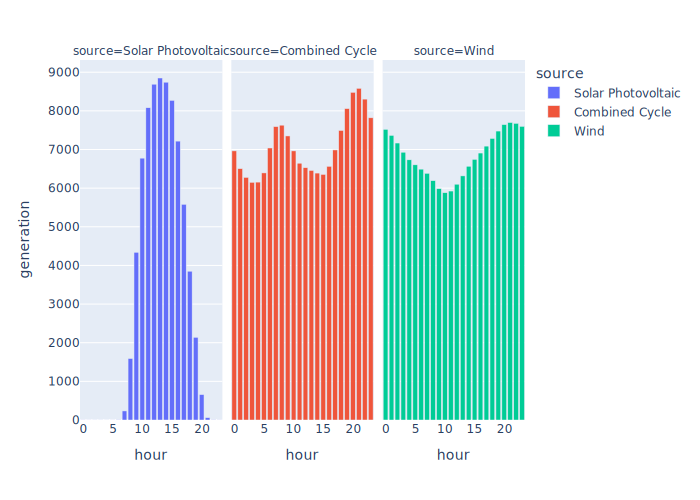

In [5]:
import plotly.express as px

fig = px.bar(dfm, x='hour', y='generation', color='source', facet_col='source')
fig